Automating Crypto API Pull using Python:

In [ ]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


In [40]:
type(data)

dict

In [41]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [42]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10162,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19346918.00000,19346918.00000,False,NaN,1,None,None,None,2023-04-15T10:12:00.000Z,30468.95703,17660781710.48034,-15.70860,0.11020,-1.19670,8.65862,22.86952,39.48105,47.05139,589480413291.22681,46.14670,639848097723.67004,None,2023-04-15T10:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-15 10:13:55.396035
1,1027,Ethereum,ETH,ethereum,6729,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120109686.10816,120109686.10816,False,NaN,2,None,None,None,2023-04-15T10:12:00.000Z,2106.61321,12038356750.15243,-18.64440,0.15781,-0.34852,12.64349,26.87452,39.13448,37.74618,253024651398.45935,19.80750,253024651398.45999,None,2023-04-15T10:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-15 10:13:55.396035
2,825,Tether,USDT,tether,51276,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,80765305448.28091,83091735571.84532,False,NaN,3,None,None,None,2023-04-15T10:12:00.000Z,1.00071,33723348542.17937,-11.17700,-0.00235,-0.01051,0.02817,-0.22782,-0.03452,0.05277,80822720331.43974,6.32700,83150804280.41000,None,2023-04-15T10:12:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-15 10:13:55.396035
3,1839,BNB,BNB,bnb,1262,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155865943.42237,155865943.42237,False,NaN,4,None,None,None,2023-04-15T10:12:00.000Z,334.38162,771186942.15512,-10.46550,0.77217,0.40897,7.12839,5.33367,13.61662,13.02331,52118706722.25481,4.08030,52118706722.25000,None,2023-04-15T10:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-15 10:13:55.396035
4,3408,USD Coin,USDC,usd-coin,11800,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,31831761945.83679,31831761945.83679,False,NaN,5,None,None,None,2023-04-15T10:12:00.000Z,0.99986,5290013750.58455,-3.23360,-0.00445,0.00582,-0.00507,-0.01357,-0.02381,-0.01074,31827301661.27937,2.49170,31827301661.28000,None,2023-04-15T10:12:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-15 10:13:55.396035
5,52,XRP,XRP,xrp,932,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51750810378.00000,99988998998.00000,False,NaN,6,None,None,None,2023-04-15T10:12:00.000Z,0.52305,1047187072.04634,-25.32360,0.24060,-1.57792,2.27231,43.74330,41.41849,36.27209,27068214735.77362,2.11910,52304909890.42000,None,2023-04-15T10:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-15 10:13:55.396035
6,2010,Cardano,ADA,cardano,766,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34777539867.83800,35677745726.91200,False,NaN,7,None,None,None,2023-04-15T10:12:00.000Z,0.45239,590425691.00519,-15.14130,0.66020,3.27500,16.01884,38.26262,25.08484,31.69437,15732889103.90919,1.23160,20357391936.47000,None,2023-04-15T10:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-15 10:13:55.396035
7,74,Dogecoin,DOGE,dogecoin,684,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,138947206383.70523,138947206383.70523,False,NaN,8,None,None,None,2023-04-15T10:12:00.000Z,0.08971,744308473.71616,-28.06970,0.67570,-0.35474,7.95228,26.71278,9.49733,6.92571,12465566837.14548,0.97590,12465566837.15000,None,202

In [43]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)


    # Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r'C:\Users\dell\OneDrive\Documents\API Runner\API.csv'):
        #df.to_csv(r'C:\Users\dell\OneDrive\Documents\API Runner\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\dell\OneDrive\Documents\API Runner\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')

# If that didn't work try using the local host URL as shown in the video

In [44]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed


KeyboardInterrupt: 

In [45]:
if not os.path.isfile(r'C:\Users\dell\OneDrive\Documents\API Runner\API.csv'):
    df.to_csv(r'C:\Users\dell\OneDrive\Documents\API Runner\API.csv', header='column_names')
else:
    df.to_csv(r'C:\Users\dell\OneDrive\Documents\API Runner\API.csv', mode='a', header=False)
        

In [46]:
df12 = pd.read_csv(r'C:\Users\dell\OneDrive\Documents\API Runner\API.csv')
df12

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,10162,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19346768.00000,19346768.00000,False,NaN,1,NaN,NaN,NaN,2023-04-15T09:48:00.000Z,30454.65184,17713714923.27219,-15.55900,0.15687,-1.12674,8.49260,23.07433,39.96384,47.51933,589199083727.85498,46.16400,639547688703.60999,NaN,2023-04-15T09:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-15 09:50:58.557411,NaN
1,1,1027,Ethereum,ETH,ethereum,6729,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120109686.10816,120109686.10816,False,NaN,2,NaN,NaN,NaN,2023-04-15T09:48:00.000Z,2107.04797,12017633335.50692,-19.57480,0.54392,-0.34762,12.46572,27.00602,40.04761,38.17268,253076870556.74979,19.82840,253076870556.75000,NaN,2023-04-15T09:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-15 09:50:58.557411,NaN
2,2,825,Tether,USDT,tether,51276,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,80765305448.28091,83091735571.84532,False,NaN,3,NaN,NaN,NaN,2023-04-15T09:48:00.000Z,1.00073,33834384524.80148,-11.21020,0.00065,-0.00527,0.03258,-0.19615,-0.03651,0.06006,80824437439.60457,6.33250,83152570849.56000,NaN,2023-04-15T09:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-15 09:50:58.557411,NaN
3,3,1839,BNB,BNB,bnb,1262,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155865959.49186,155865959.49186,False,NaN,4,NaN,NaN,NaN,2023-04-15T09:48:00.000Z,333.01608,762478007.71424,-11.77110,0.52068,-0.05285,6.62724,4.23473,13.88273,12.99727,51905870655.46385,4.06690,51905870655.46000,NaN,2023-04-15T09:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-15 09:50:58.557411,NaN
4,4,3408,USD Coin,USDC,usd-coin,11800,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,31831761945.83679,31831761945.83679,False,NaN,5,NaN,NaN,NaN,2023-04-15T09:48:00.000Z,0.99996,5309037315.04200,-3.16870,0.01041,0.00721,0.00755,0.05457,-0.00695,-0.00368,31830630105.27162,2.49400,31830630105.27000,NaN,2023-04-15T09:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-15 09:50:58.557411,NaN
5,5,52,XRP,XRP,xrp,932,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,51750810378.00000,99988998998.00000,False,NaN,6,NaN,NaN,NaN,2023-04-15T09:48:00.000Z,0.52267,1053587692.76973,-25.18730,0.24921,-1.68164,2.35577,43.35828,41.68020,36.56643,27048616862.69753,2.11930,52267040197.30000,NaN,2023-04-15T09:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-15 09:50:58.557411,NaN
6,6,2010,Cardano,ADA,cardano,766,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34777541113.97100,35677745726.91200,False,NaN,7,NaN,NaN,NaN,2023-04-15T09:48:00.000Z,0.44839,577481102.76444,-17.23490,0.30548,2.45303,15.01540,36.42878,24.43954,30.93470,15593985141.10771,1.22180,20177658019.30000,NaN,2023-04-15T09:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-15 09:50:58.557411,NaN
7,7,74,Dogecoin,DOGE,dogecoin,684,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,138946096383.70520,138946096383.70520,False,NaN,8,NaN,NaN,NaN,2023-04-15T09:48:00.000Z,0.08966,741016414.51687,-32.01060,0.74975,-0.39156,7.74640,26.46820,9.93727,7.23618,12457954087.98710,0.9

In [47]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10162,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19346918.00000,19346918.00000,False,NaN,1,None,None,None,2023-04-15T10:12:00.000Z,30468.95703,17660781710.48034,-15.70860,0.11020,-1.19670,8.65862,22.86952,39.48105,47.05139,589480413291.22681,46.14670,639848097723.67004,None,2023-04-15T10:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-15 10:13:55.396035,NaT
1,1027,Ethereum,ETH,ethereum,6729,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120109686.10816,120109686.10816,False,NaN,2,None,None,None,2023-04-15T10:12:00.000Z,2106.61321,12038356750.15243,-18.64440,0.15781,-0.34852,12.64349,26.87452,39.13448,37.74618,253024651398.45935,19.80750,253024651398.45999,None,2023-04-15T10:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-15 10:13:55.396035,NaT
2,825,Tether,USDT,tether,51276,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,80765305448.28091,83091735571.84532,False,NaN,3,None,None,None,2023-04-15T10:12:00.000Z,1.00071,33723348542.17937,-11.17700,-0.00235,-0.01051,0.02817,-0.22782,-0.03452,0.05277,80822720331.43974,6.32700,83150804280.41000,None,2023-04-15T10:12:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-15 10:13:55.396035,NaT
3,1839,BNB,BNB,bnb,1262,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155865943.42237,155865943.42237,False,NaN,4,None,None,None,2023-04-15T10:12:00.000Z,334.38162,771186942.15512,-10.46550,0.77217,0.40897,7.12839,5.33367,13.61662,13.02331,52118706722.25481,4.08030,52118706722.25000,None,2023-04-15T10:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-15 10:13:55.396035,NaT
4,3408,USD Coin,USDC,usd-coin,11800,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,31831761945.83679,31831761945.83679,False,NaN,5,None,None,None,2023-04-15T10:12:00.000Z,0.99986,5290013750.58455,-3.23360,-0.00445,0.00582,-0.00507,-0.01357,-0.02381,-0.01074,31827301661.27937,2.49170,31827301661.28000,None,2023-04-15T10:12:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-15 10:13:55.396035,NaT
5,52,XRP,XRP,xrp,932,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51750810378.00000,99988998998.00000,False,NaN,6,None,None,None,2023-04-15T10:12:00.000Z,0.52305,1047187072.04634,-25.32360,0.24060,-1.57792,2.27231,43.74330,41.41849,36.27209,27068214735.77362,2.11910,52304909890.42000,None,2023-04-15T10:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-15 10:13:55.396035,NaT
6,2010,Cardano,ADA,cardano,766,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34777539867.83800,35677745726.91200,False,NaN,7,None,None,None,2023-04-15T10:12:00.000Z,0.45239,590425691.00519,-15.14130,0.66020,3.27500,16.01884,38.26262,25.08484,31.69437,15732889103.90919,1.23160,20357391936.47000,None,2023-04-15T10:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-15 10:13:55.396035,NaT
7,74,Dogecoin,DOGE,dogecoin,684,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,138947206383.70523,138947206383.70523,False,NaN,8,None,None,None,2023-04-15T10:12:00.000Z,0.08971,744308473.71616,-28.06970,0.67570,-0.35474,7.95228,26.71278,9.49733,6.92571,12465566837.14

In [48]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [49]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10162,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19346918.00000,19346918.00000,False,NaN,1,None,None,None,2023-04-15T10:12:00.000Z,30468.95703,17660781710.48034,-15.70860,0.11020,-1.19670,8.65862,22.86952,39.48105,47.05139,589480413291.22681,46.14670,639848097723.67004,None,2023-04-15T10:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-15 10:13:55.396035,NaT
1,1027,Ethereum,ETH,ethereum,6729,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120109686.10816,120109686.10816,False,NaN,2,None,None,None,2023-04-15T10:12:00.000Z,2106.61321,12038356750.15243,-18.64440,0.15781,-0.34852,12.64349,26.87452,39.13448,37.74618,253024651398.45935,19.80750,253024651398.45999,None,2023-04-15T10:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-15 10:13:55.396035,NaT
2,825,Tether,USDT,tether,51276,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,80765305448.28091,83091735571.84532,False,NaN,3,None,None,None,2023-04-15T10:12:00.000Z,1.00071,33723348542.17937,-11.17700,-0.00235,-0.01051,0.02817,-0.22782,-0.03452,0.05277,80822720331.43974,6.32700,83150804280.41000,None,2023-04-15T10:12:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-15 10:13:55.396035,NaT
3,1839,BNB,BNB,bnb,1262,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155865943.42237,155865943.42237,False,NaN,4,None,None,None,2023-04-15T10:12:00.000Z,334.38162,771186942.15512,-10.46550,0.77217,0.40897,7.12839,5.33367,13.61662,13.02331,52118706722.25481,4.08030,52118706722.25000,None,2023-04-15T10:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-15 10:13:55.396035,NaT
4,3408,USD Coin,USDC,usd-coin,11800,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,31831761945.83679,31831761945.83679,False,NaN,5,None,None,None,2023-04-15T10:12:00.000Z,0.99986,5290013750.58455,-3.23360,-0.00445,0.00582,-0.00507,-0.01357,-0.02381,-0.01074,31827301661.27937,2.49170,31827301661.28000,None,2023-04-15T10:12:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-15 10:13:55.396035,NaT
5,52,XRP,XRP,xrp,932,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51750810378.00000,99988998998.00000,False,NaN,6,None,None,None,2023-04-15T10:12:00.000Z,0.52305,1047187072.04634,-25.32360,0.24060,-1.57792,2.27231,43.74330,41.41849,36.27209,27068214735.77362,2.11910,52304909890.42000,None,2023-04-15T10:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-15 10:13:55.396035,NaT
6,2010,Cardano,ADA,cardano,766,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34777539867.83800,35677745726.91200,False,NaN,7,None,None,None,2023-04-15T10:12:00.000Z,0.45239,590425691.00519,-15.14130,0.66020,3.27500,16.01884,38.26262,25.08484,31.69437,15732889103.90919,1.23160,20357391936.47000,None,2023-04-15T10:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-15 10:13:55.396035,NaT
7,74,Dogecoin,DOGE,dogecoin,684,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,138947206383.70523,138947206383.70523,False,NaN,8,None,None,None,2023-04-15T10:12:00.000Z,0.08971,744308473.71616,-28.06970,0.67570,-0.35474,7.95228,26.71278,9.49733,6.92571,12465566837.14

In [50]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.10226,-1.20539,8.65051,22.85530,39.47734,47.04130
Ethereum,0.15239,-0.36579,12.62790,26.86196,39.12467,37.72536
Tether,-0.00305,-0.00896,0.03038,-0.22786,-0.03444,0.05236
BNB,0.75949,0.41142,7.13017,5.35986,13.64179,13.00313
USD Coin,-0.00149,0.00899,0.00010,-0.00891,-0.01739,-0.00808
XRP,0.22861,-1.58009,2.26812,43.76795,41.40872,36.25682
Cardano,0.67565,3.28854,16.05427,38.35224,25.10922,31.71099
Dogecoin,0.66620,-0.33767,7.97516,26.79619,9.52642,6.94105
Polygon,0.54004,-1.69330,4.06030,1.72811,-1.98401,20.43647


In [51]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     0.10226
             quote.USD.percent_change_24h   -1.20539
             quote.USD.percent_change_7d     8.65051
             quote.USD.percent_change_30d   22.85530
             quote.USD.percent_change_60d   39.47734
             quote.USD.percent_change_90d   47.04130
Ethereum     quote.USD.percent_change_1h     0.15239
             quote.USD.percent_change_24h   -0.36579
             quote.USD.percent_change_7d    12.62790
             quote.USD.percent_change_30d   26.86196
             quote.USD.percent_change_60d   39.12467
             quote.USD.percent_change_90d   37.72536
Tether       quote.USD.percent_change_1h    -0.00305
             quote.USD.percent_change_24h   -0.00896
             quote.USD.percent_change_7d     0.03038
             quote.USD.percent_change_30d   -0.22786
             quote.USD.percent_change_60d   -0.03444
             quote.USD.percent_change_90d    0.05236
BNB 

In [52]:
type(df4)

pandas.core.series.Series

In [53]:
df5 = df4.to_frame(name='values')
df5

values
name                                             
Bitcoin     quote.USD.percent_change_1h   0.10226
            quote.USD.percent_change_24h -1.20539
            quote.USD.percent_change_7d   8.65051
            quote.USD.percent_change_30d 22.85530
            quote.USD.percent_change_60d 39.47734
            quote.USD.percent_change_90d 47.04130
Ethereum    quote.USD.percent_change_1h   0.15239
            quote.USD.percent_change_24h -0.36579
            quote.USD.percent_change_7d  12.62790
            quote.USD.percent_change_30d 26.86196
            quote.USD.percent_change_60d 39.12467
            quote.USD.percent_change_90d 37.72536
Tether      quote.USD.percent_change_1h  -0.00305
            quote.USD.percent_change_24h -0.00896
            quote.USD.percent_change_7d   0.03038
            quote.USD.percent_change_30d -0.22786
            quote.USD.percent_change_60d -0.03444
            quote.USD.percent_change_90d  0.05236
BNB         quote.USD.percent_change_1h   0.75949
            quote.USD.percent_change_24h  0.41142
            quote.USD.percent_change_7d   7.13017
            quote.USD.percent_change_30d  5.35986
            quote.USD.percent_change_60d 13.64179
            quote.USD.percent_change_90d 13.00313
USD Coin    quote.USD.percent_change_1h  -0.00149
            quote.USD.percent_change_24h  0.00899
            quote.USD.percent_change_7d   0.00010
            quote.USD.percent_change_30d -0.00891
            quote.USD.percent_change_60d -0.01739
            quote.USD.percent_change_90d -0.00808
XRP         quote.USD.percent_change_1h   0.22861
            quote.USD.percent_change_24h -1.58009
            quote.USD.percent_change_7d   2.26812
            quote.USD.percent_change_30d 43.76795
            quote.USD.percent_change_60d 41.40872
            quote.USD.percent_change_90d 36.25682
Cardano     quote.USD.percent_change_1h   0.67565
            quote.USD.percent_change_24h  3.28854
            quote.USD.percent_change_7d  16.05427
            quote.USD.percent_change_30d 38.35224
            quote.USD.percent_change_60d 25.10922
            quote.USD.percent_change_90d 31.71099
Dogecoin    quote.USD.percent_change_1h   0.66620
            quote.USD.percent_change_24h -0.33767
            quote.USD.percent_change_7d   7.97516
            quote.USD.percent_change_30d 26.79619
            quote.USD.percent_change_60d  9.52642
            quote.USD.percent_change_90d  6.94105
Polygon     quote.USD.percent_change_1h   0.54004
            quote.USD.percent_change_24h -1.69330
            quote.USD.percent_change_7d   4.06030
            quote.USD.percent_change_30d  1.72811
            quote.USD.percent_change_60d -1.98401
            quote.USD.percent_change_90d 20.43647
Solana      quote.USD.percent_change_1h   0.74295
            quote.USD.percent_change_24h -2.32047
            quote.USD.percent_change_7d  19.00654
            quote.USD.percent_change_30d 24.94504
            quote.USD.percent_change_60d 14.36702
            quote.USD.percent_change_90d  8.42642
Polkadot    quote.USD.percent_change_1h   0.63211
            quote.USD.percent_change_24h  0.10345
            quote.USD.percent_change_7d   9.45817
            quote.USD.percent_change_30d 11.95612
            quote.USD.percent_change_60d 10.58559
            quote.USD.percent_change_90d 14.83823
Litecoin    quote.USD.percent_change_1h   0.43406
            quote.USD.percent_change_24h -0.73471
            quote.USD.percent_change_7d   6.44648
            quote.USD.percent_change_30d 22.07360
            quote.USD.percent_change_60d  5.26397
            quote.USD.percent_change_90d 11.63074
Binance USD quote.USD.percent_change_1h  -0.00183
            quote.USD.percent_change_24h  0.01996
            quote.USD.percent_change_7d   0.09721
            quote.USD.percent_change_30d  0.07907
            quote.USD.percent_change_60d  0.12270
            quote.USD.percent_change_90d  0.05216
Shiba Inu   quote.USD.percent_change_1h   0

In [54]:
df5.count()

values    90
dtype: int64

In [55]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.10226
1,Bitcoin,quote.USD.percent_change_24h,-1.20539
2,Bitcoin,quote.USD.percent_change_7d,8.65051
3,Bitcoin,quote.USD.percent_change_30d,22.85530
4,Bitcoin,quote.USD.percent_change_60d,39.47734
5,Bitcoin,quote.USD.percent_change_90d,47.04130
6,Ethereum,quote.USD.percent_change_1h,0.15239
7,Ethereum,quote.USD.percent_change_24h,-0.36579
8,Ethereum,quote.USD.percent_change_7d,12.62790
9,Ethereum,quote.USD.percent_change_30d,26.86196


In [56]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.10226
1,Bitcoin,quote.USD.percent_change_24h,-1.20539
2,Bitcoin,quote.USD.percent_change_7d,8.65051
3,Bitcoin,quote.USD.percent_change_30d,22.85530
4,Bitcoin,quote.USD.percent_change_60d,39.47734
5,Bitcoin,quote.USD.percent_change_90d,47.04130
6,Ethereum,quote.USD.percent_change_1h,0.15239
7,Ethereum,quote.USD.percent_change_24h,-0.36579
8,Ethereum,quote.USD.percent_change_7d,12.62790
9,Ethereum,quote.USD.percent_change_30d,26.86196


In [57]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.10226
1,Bitcoin,24h,-1.20539
2,Bitcoin,7d,8.65051
3,Bitcoin,30d,22.85530
4,Bitcoin,60d,39.47734
5,Bitcoin,90d,47.04130
6,Ethereum,1h,0.15239
7,Ethereum,24h,-0.36579
8,Ethereum,7d,12.62790
9,Ethereum,30d,26.86196


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

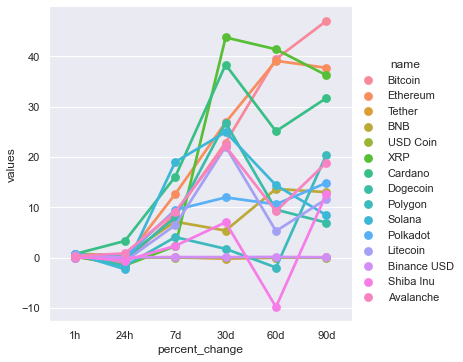

In [59]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [60]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,30468.95703,2023-04-15 10:13:55.396035
0,Bitcoin,30468.95703,NaT
0,Bitcoin,30462.05359,NaT
